# Machine Learning 2

Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

In this section, we perform our Machine Learning part 2. The following ML models from ```scikit-learn``` are used:

---
**Data Preprocessing**
- OneHotEncoder

**Classification**
- DecisionTreeClassifier
- RandomForestClassifier

**Others**
- Resample
- GridSearchCV
- permutation_importance

More details on these models at: https://scikit-learn.org/stable/


Import the essential library

In [1]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set                                  # this is to set the default Seaborn style for graphics

<function seaborn.rcmod.set(*args, **kwargs)>

In [2]:
import warnings
warnings.filterwarnings('ignore')

We will first extract the dataset and assign to a new dataset named **avi_clean** 

In [3]:
avi_clean = pd.read_csv("Cleaned Aviation Data.csv", encoding='latin-1')
avi_clean

,Unnamed: 0,Accident.Number,Investigation.Type,Event Year,Location,Country,Injury.Severity,Aircraft.damage,Make,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Fatal.rate,Number of plane involved
0,0,SEA87LA080,Accident,1948,"MOOSE CREEK, ID",United States,Fatal,Destroyed,STINSON,No,...,Reciprocating,Personal,2,0,0,0,Unknown,4,100.00,1
1,1,LAX94LA336,Accident,1962,"BRIDGEPORT, CA",United States,Fatal,Destroyed,PIPER,No,...,Reciprocating,Personal,4,0,0,0,Unknown,0,100.00,1
2,2,NYC07LA005,Accident,1974,"Saltville, VA",United States,Fatal,Destroyed,CESSNA,No,...,Reciprocating,Personal,3,0,0,1,Instrument Meterological Conditions,4,75.00,1
3,3,LAX96LA321,Accident,1977,"EUREKA, CA",United States,Fatal,Destroyed,ROCKWELL,No,...,Reciprocating,Personal,2,0,0,0,Instrument Meterological Conditions,4,100.00,1
4,4,CHI79FA064,Accident,1979,"Canton, OH",United States,Fatal,Destroyed,CESSNA,No,...,Unknown,Personal,1,2,0,0,Visual Meteorological Conditions,3,33.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,87277,GAA22WA054,Accident,2021,"Auxerre, OF",United States,Fatal,Destroyed,CIRRUS DESIGN CORP,No,...,Unknown,Unknown,1,0,0,0,Unknown,0,100.00,1
87278,87278,WPR22LA069,Accident,2021,"Auburn, CA",United States,Non-Fatal,Unknown,CESSNA,No,...,Unknown,Positioning,0,0,1,0,Unknown,0,0.00,1
87279,87279,CEN22FA082,Accident,2021,"Hardy, AR",United States,Fatal,Unknown,CESSNA,No,...,Unknown,Personal,2,0,0,0,Unknown,0,100.00,1
87280,87280,ERA22LA097,Accident,2021,"Marathon, FL",United States,Non-Fatal,Unknown,CESSNA,No,...,Unknown,Unknown,0,3,0,0,Unknown,0,0.00,1


We will focus on the categorical response of **Injury Severity**. We are going to start with `DecisionTreeClassifier`, followed by `RandomForestClassifier`. We will use **cross-validation technique** to improve on the model. In between, we will be using *OneHotEncoder*, *resampling*  and *permutation importance* to facilitate our model building.

Response Variable: **Injury Severity**\
Predictor Feature (Categorical): **Investigation type**, **Aircraft Damage**, **Amateur Built**, **Engine Type**, **Purpose of flight*, **Weather Condition**, **Broad Phase of Flight**\
Predictor Feature (Numeric): **Number of plane involved**, **Number of engine**

Before we start with **Classification**, we need to encode our **categorical predictors** for a better fit of machine learning for prediction later. Therefore, we will next using `OneHotEncoder`to perform this step.

#### OneHotEncoder (encode categorical predictors)

This model encodes categorical features as a on-hot numeric array. In this startegy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 

More details at: \
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

avi_acc2_cat = avi_clean[["Investigation.Type", "Aircraft.damage", "Amateur.Built", "Engine.Type", "Purpose.of.flight", 
                         "Weather.Condition", "Broad.phase.of.flight"]]
ohe.fit(avi_acc2_cat)
ohe_avi_acc2_cat = pd.DataFrame(ohe.transform(avi_acc2_cat).toarray(),
                               columns = ohe.get_feature_names_out(avi_acc2_cat.columns))
ohe_avi_acc2_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 56 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Investigation.Type_Accident                            87282 non-null  float64
 1   Investigation.Type_Incident                            87282 non-null  float64
 2   Aircraft.damage_Destroyed                              87282 non-null  float64
 3   Aircraft.damage_Minor                                  87282 non-null  float64
 4   Aircraft.damage_Substantial                            87282 non-null  float64
 5   Aircraft.damage_Unknown                                87282 non-null  float64
 6   Amateur.Built_No                                       87282 non-null  float64
 7   Amateur.Built_Unknown                                  87282 non-null  float64
 8   Amateur.Built_Yes                             

We will then generate a new panda DataFrame for machine learning which consists of the numeric variables, encoded categorical variables and responding variables. 

In [5]:
avi_acc2_num = avi_clean[["Number.of.Engines", "Number of plane involved"]]
avi_acc2_res = avi_clean[["Injury.Severity"]]

avi_acc2_ohe = pd.concat([avi_acc2_num, ohe_avi_acc2_cat, avi_acc2_res], 
                        sort=False, axis = 1).reindex(index = avi_acc2_num.index)
avi_acc2_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Number.of.Engines                                      87282 non-null  int64  
 1   Number of plane involved                               87282 non-null  int64  
 2   Investigation.Type_Accident                            87282 non-null  float64
 3   Investigation.Type_Incident                            87282 non-null  float64
 4   Aircraft.damage_Destroyed                              87282 non-null  float64
 5   Aircraft.damage_Minor                                  87282 non-null  float64
 6   Aircraft.damage_Substantial                            87282 non-null  float64
 7   Aircraft.damage_Unknown                                87282 non-null  float64
 8   Amateur.Built_No                              

### DecisionTreeClassifier (Initial data)

We will be starting with **Classification** by using the data (after the categorical variables encoded). 

Also, we will be using all predictors (numeric and categorical) to predict our responding variable `Aircraft Damage`. 

Import the essential libraries. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [7]:
y = pd.DataFrame(avi_acc2_ohe["Injury.Severity"])
x = pd.DataFrame(avi_acc2_ohe.drop("Injury.Severity", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #split the data into train:test=8:2

We have decided to plot a DecisionTreeClassifier with **max_depth of 4** (by random guesses). We will first fit the model with train data.

**Note:**

The number of class in the decision tree represents the level of injury severity. Details are as follow:

| Previous | Current |
| :-----------| :---------- |
| Incident | 1 |
| Non-Fatal | 2 |
| Fatal | 3 |
| Unavailable | 0 |


[Text(0.45689655172413796, 0.9, 'Aircraft.damage_Destroyed <= 0.5\ngini = 0.377\nsamples = 69825\nvalue = [14047, 1766, 53241, 771]\nclass = Non-Fatal'),
 Text(0.1896551724137931, 0.7, 'Investigation.Type_Accident <= 0.5\ngini = 0.215\nsamples = 55078\nvalue = [4028, 1762, 48582, 706]\nclass = Non-Fatal'),
 Text(0.06896551724137931, 0.5, 'Broad.phase.of.flight_0 <= 0.5\ngini = 0.562\nsamples = 2976\nvalue = [1, 1762, 742, 471]\nclass = Incident'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 1509\nvalue = [0, 1509, 0, 0]\nclass = Incident'),
 Text(0.10344827586206896, 0.3, 'Weather.Condition_Unknown <= 0.5\ngini = 0.611\nsamples = 1467\nvalue = [1, 253, 742, 471]\nclass = Non-Fatal'),
 Text(0.06896551724137931, 0.1, 'gini = 0.402\nsamples = 408\nvalue = [1, 77, 305, 25]\nclass = Non-Fatal'),
 Text(0.13793103448275862, 0.1, 'gini = 0.625\nsamples = 1059\nvalue = [0, 176, 437, 446]\nclass = Fatal'),
 Text(0.3103448275862069, 0.5, 'Weather.Condition_Visual Meteorological Condit

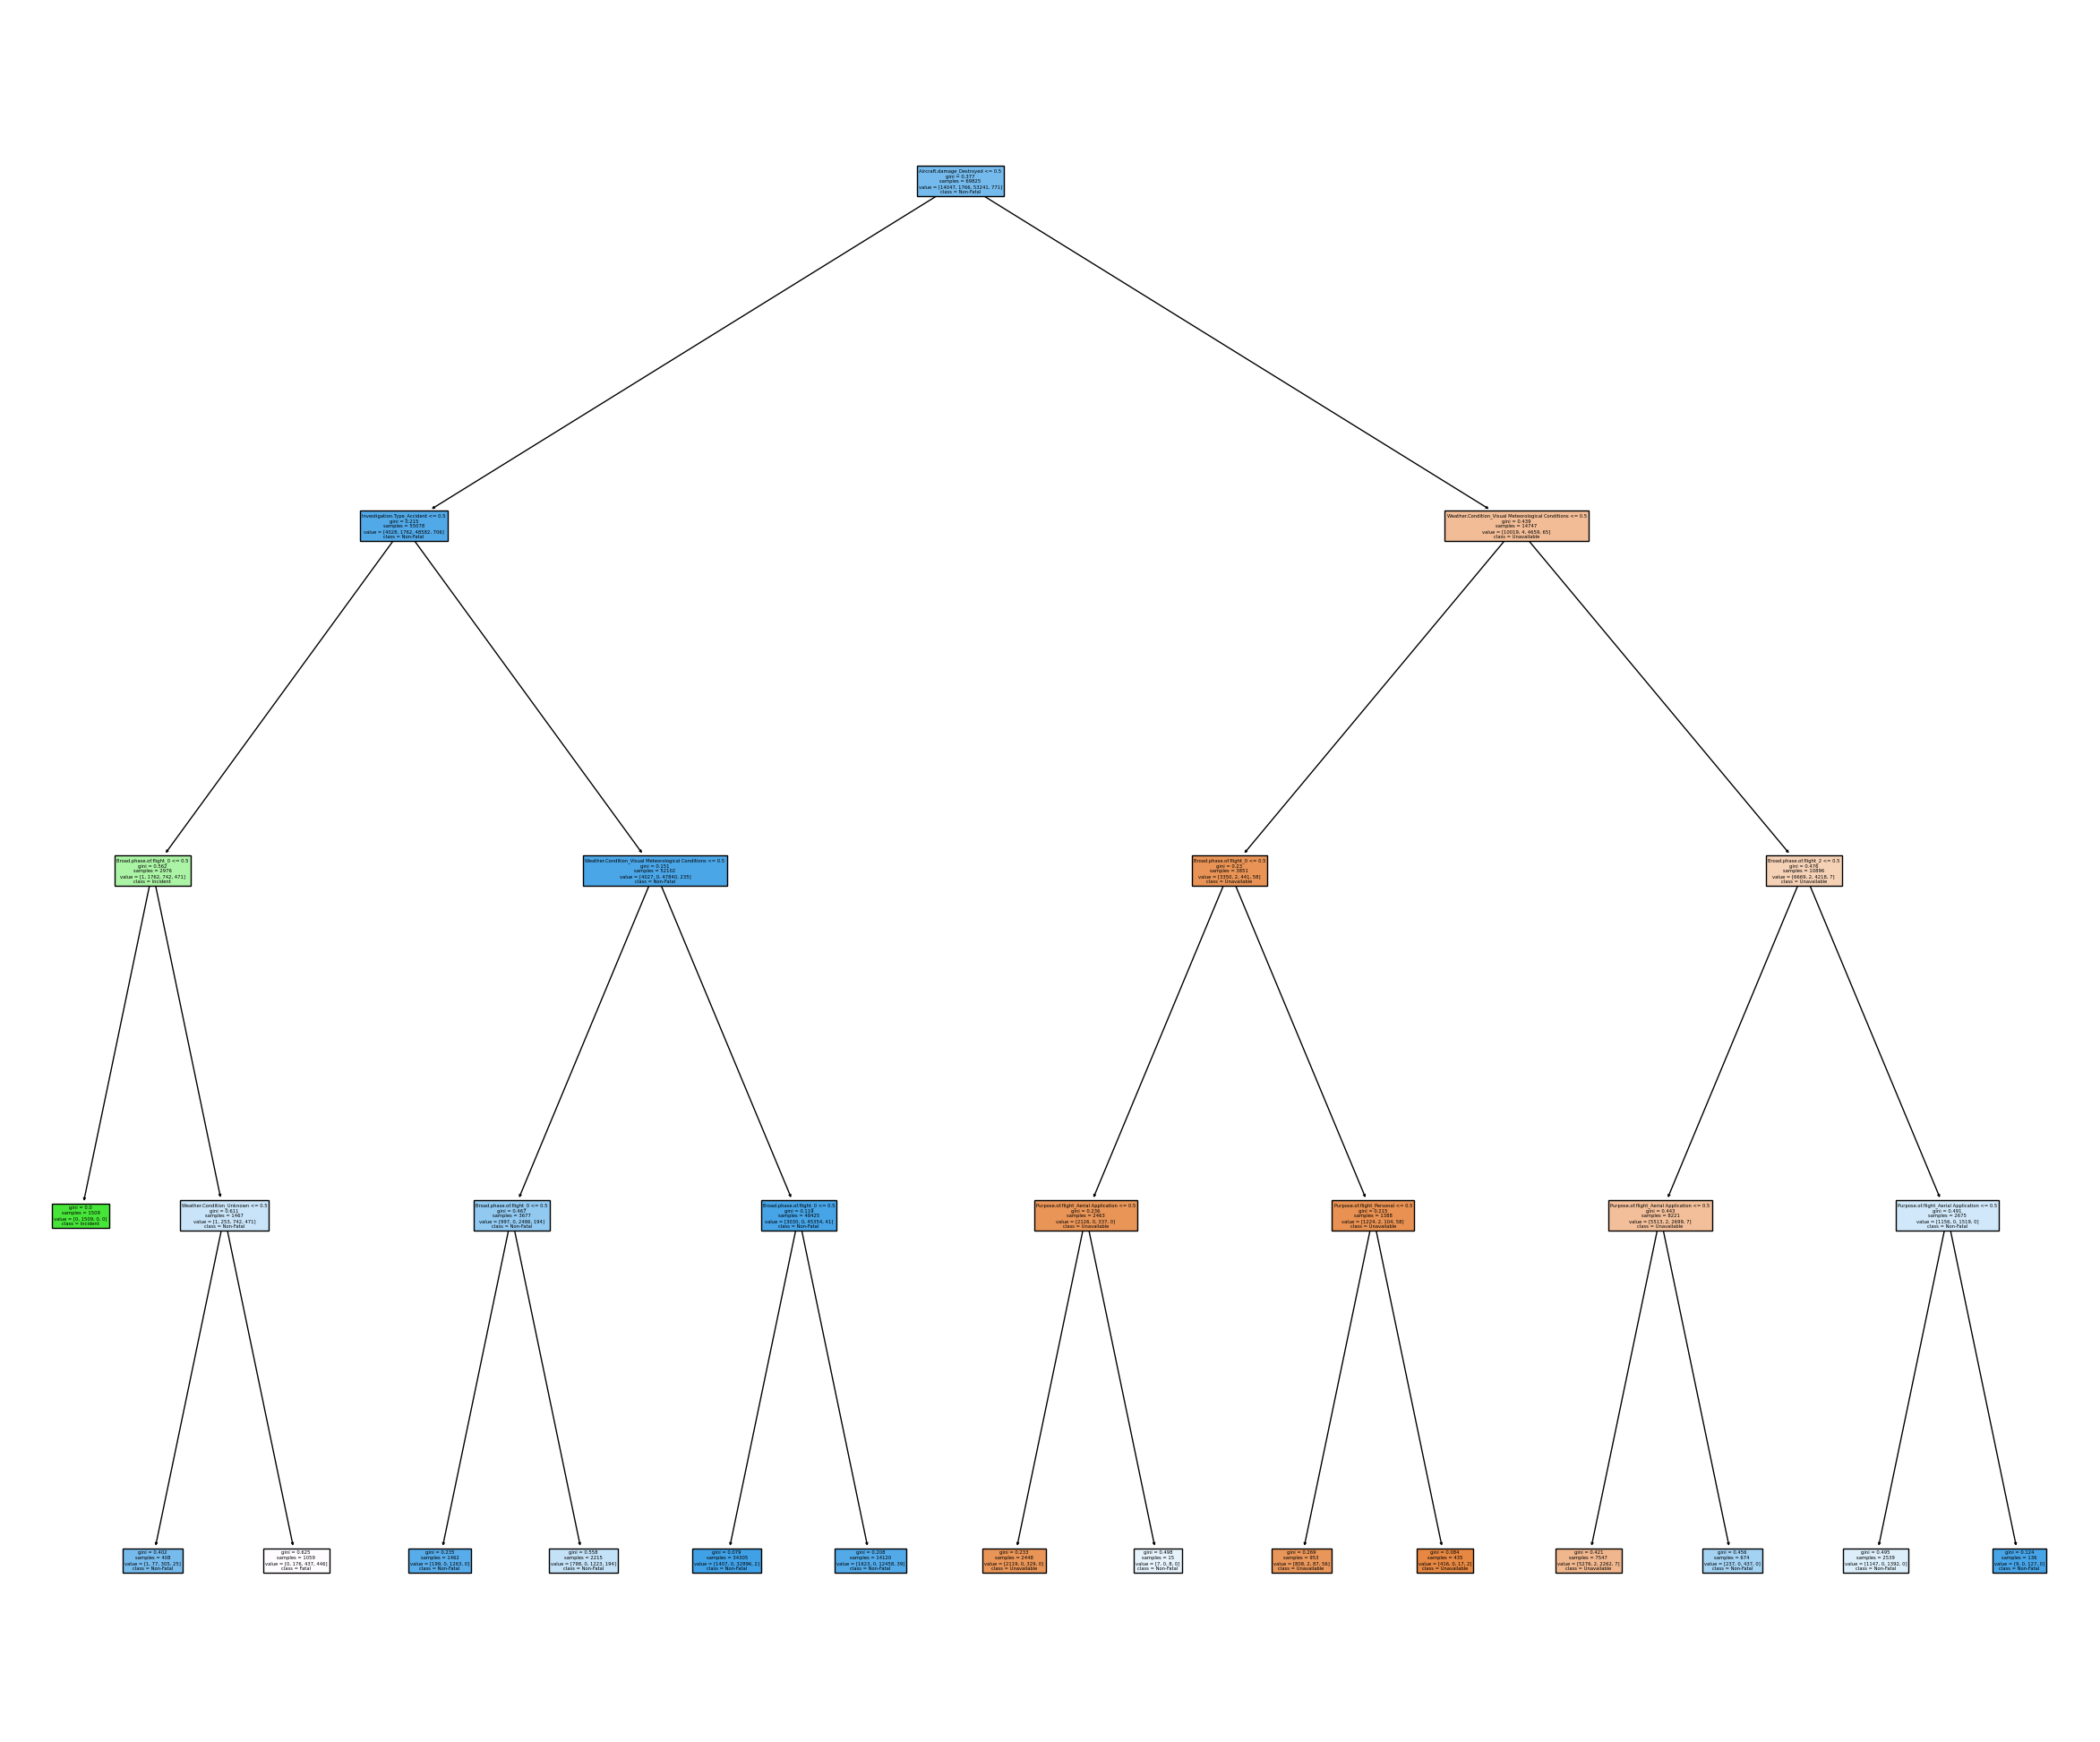

In [8]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(x_train, y_train)

f = plt.figure(figsize = (30,25))
plot_tree(dectree, filled=True, feature_names = x_train.columns, class_names = ["Unavailable","Incident","Non-Fatal","Fatal"])

We will now predict the **train data** using the model we have trained just now. The **heatmap of confusion matrix** is plotted following the format below.

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3   |   True 3    |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

<AxesSubplot:>

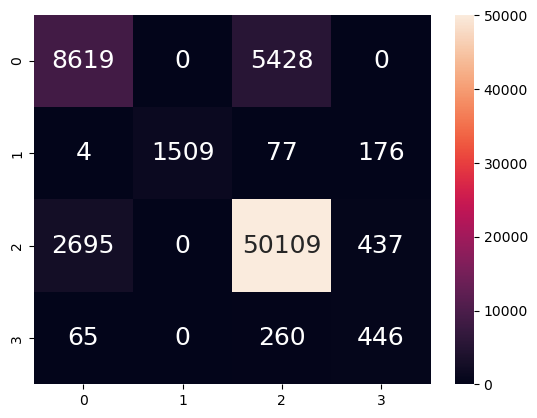

In [9]:
y_train_pred = dectree.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [10]:
print("Train Data")
print("Accuracy:\t", dectree.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.8690726817042607

True positive rate of class 0 train data:	 0.6135829714529792
False negative rate of class 0 train data:	 0.3864170285470207

True positive rate of class 1 train data:	 0.8544733861834655
False negative rate of class 1 train data:	 0.14552661381653453

True positive rate of class 2 train data:	 0.9411731560263706
False negative rate of class 2 train data:	 0.05882684397362935

True positive rate of class 3 train data:	 0.5784695201037614
False negative rate of class 3 train data:	 0.42153047989623865


We will now predict the **test data** using the model we have trained just now. The **heatmap of confusion matrix** is plotted following the format below.

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3   |   True 3    |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

<AxesSubplot:>

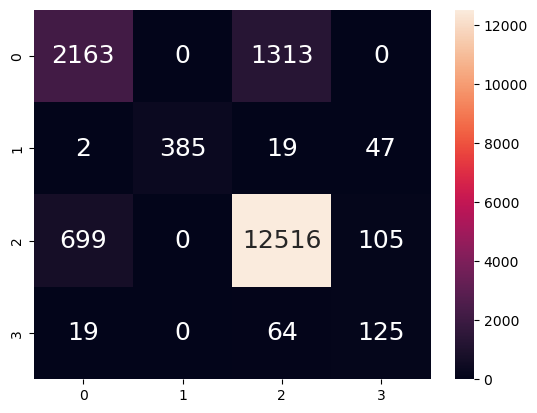

In [11]:
y_test_pred = dectree.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [12]:
print("Test Data")
print("Accuracy:\t", dectree.score(x_test, y_test))
print()
cm_Test = confusion_matrix(y_test, y_test_pred)
true0 = cm_Test[0][0]
true1 = cm_Test[1][1]
true2 = cm_Test[2][2]
true3 = cm_Test[3][3]
false0 = cm_Test[0][1] + cm_Test[0][2] + cm_Test[0][3]
false1 = cm_Test[1][0] + cm_Test[1][2] + cm_Test[1][3]
false2 = cm_Test[2][0] + cm_Test[2][1] + cm_Test[2][3]
false3 = cm_Test[3][0] + cm_Test[3][1] + cm_Test[3][2]

print("True positive rate of class 0 Test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 Test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 Test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 Test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 Test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 Test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 Test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 Test data:\t",(false3/(true3+false3)))

Test Data
Accuracy:	 0.870080769891734

True positive rate of class 0 Test data:	 0.6222669735327964
False negative rate of class 0 Test data:	 0.3777330264672037

True positive rate of class 1 Test data:	 0.8498896247240618
False negative rate of class 1 Test data:	 0.15011037527593818

True positive rate of class 2 Test data:	 0.9396396396396396
False negative rate of class 2 Test data:	 0.06036036036036036

True positive rate of class 3 Test data:	 0.6009615384615384
False negative rate of class 3 Test data:	 0.39903846153846156


Notice that we have an extremely high accuracy in `Injury Severity` class 1 and class 2. However, we must also notice that for other classes (class 0 and 3), the accuracy is relatively lower in both train and test data. 

Although the overall accuracy is reaching a high value of 0.87, the machine learning accuracy is biased towards class 1 and class 2 data only. Hence, more fine-tuning is required for a better model of machine learning.  

### Resampling of data 

#### Imbalanced Data

The degree of imbalance of a data can be refered from the table bellow:

| Degree of Imbalance | Proportion of Minority Class |
| :------------------ | ----------------------------:|
| Mild                | 20-40% of the data set       |
| Moderate            | 1-20% of the data set        |
| Extreme             | <1% of the data set          |

More details at: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

Since `Injury Severity` is the response variable, we should look at the distribution of **Injury Severity** by plotting a categorical plot. 

Non-Fatal      66561
Fatal          17523
Incident        2219
Unavailable      979
Name: Injury.Severity, dtype: int64

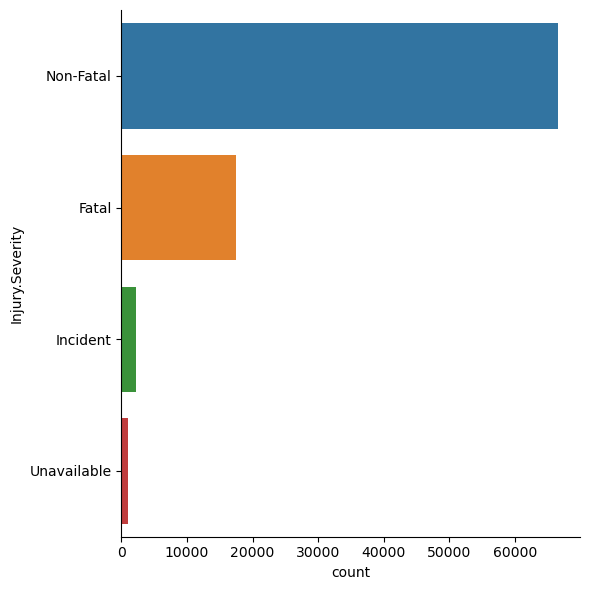

In [13]:
sb.catplot(y = "Injury.Severity" , data = avi_acc2_ohe, kind = "count", height = 6, 
           order = avi_acc2_ohe["Injury.Severity"].value_counts().index)
avi_acc2_ohe["Injury.Severity"].value_counts()

From the calculation below, we can tell that our data for aviation accident has **mild degree of imbalance**. 

In [14]:
minority_sum = (avi_acc2_ohe["Injury.Severity"]!="Non-Fatal").sum()
print("Proportion of Minority Class:\t", round((minority_sum/len(avi_acc2_ohe)*100),2),"%")

Proportion of Minority Class:	 23.74 %


### Resample - Upsampling

The model resamples arrays or sparse matrices in a consistent way. Here, we use it to upsample our sizes of `Injury.Severity` **fatal, incident and unavailable** to the size of **non-fatal**. By applying this step, we solve the issue of the biased data. However, it might affect our prediction accuracy. We will solve the new issue in a later part.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

Note that we are using the ```scikit-learn.utils``` ```resample``` instead of the ```resample``` from ```pandas``` library, which mainly works on time-series data.

Import the essential library.

In [15]:
from sklearn.utils import resample

We will now upsampling the class size of the other Injury Severity variables to the class size of `Non-Fatal` of Injury Severity

In [16]:
damage0 = avi_acc2_ohe[avi_acc2_ohe["Injury.Severity"] == "Unavailable"]
damage1 = avi_acc2_ohe[avi_acc2_ohe["Injury.Severity"] == "Incident"]
damage2 = avi_acc2_ohe[avi_acc2_ohe["Injury.Severity"] == "Non-Fatal"]
damage3 = avi_acc2_ohe[avi_acc2_ohe["Injury.Severity"] == "Fatal"]

re_damage0 = resample(damage0, replace = True, n_samples = damage2.shape[0])
re_damage1 = resample(damage1, replace = True, n_samples = damage2.shape[0])
re_damage3 = resample(damage3, replace = True, n_samples = damage2.shape[0])

We can now see all classes of **Aircraft Damage** are having the same number now. The sample now is much more balanced, which can be illutrated by the categorical plot below.  

In [17]:
re_avi_acc2_ohe = pd.concat([damage2, re_damage0, re_damage1, re_damage3])
re_avi_acc2_ohe["Injury.Severity"].value_counts()

Non-Fatal      66561
Unavailable    66561
Incident       66561
Fatal          66561
Name: Injury.Severity, dtype: int64

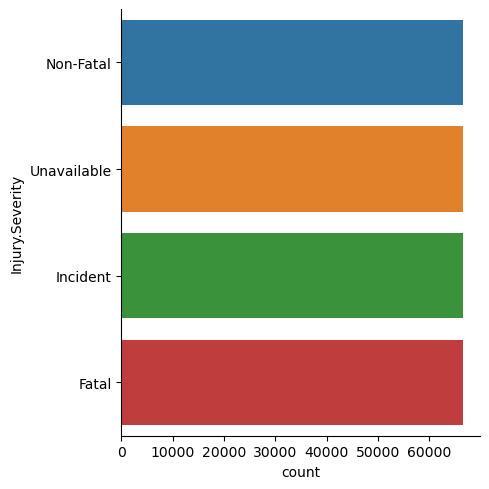

In [18]:
sb.catplot(y = "Injury.Severity", data = re_avi_acc2_ohe, kind = "count")

### DecisionTreeClassifier (Upsampling data)

We will now be using the resampled data to perform **classification** process again using `DecisionTreeClassifier`. The data we are using are shown below. 

In [19]:
re_avi_acc2_ohe

,Number.of.Engines,Number of plane involved,Investigation.Type_Accident,Investigation.Type_Incident,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,Aircraft.damage_Unknown,Amateur.Built_No,Amateur.Built_Unknown,...,Purpose.of.flight_Unknown,Weather.Condition_Instrument Meterological Conditions,Weather.Condition_Unknown,Weather.Condition_Visual Meteorological Conditions,Broad.phase.of.flight_0,Broad.phase.of.flight_1,Broad.phase.of.flight_2,Broad.phase.of.flight_3,Broad.phase.of.flight_4,Injury.Severity
5,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Non-Fatal
7,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Non-Fatal
8,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Non-Fatal
9,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Non-Fatal
10,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Non-Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54332,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Fatal
69234,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Fatal
54304,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Fatal
67839,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Fatal


In [20]:
y = pd.DataFrame(re_avi_acc2_ohe["Injury.Severity"])
x = pd.DataFrame(re_avi_acc2_ohe.drop("Injury.Severity", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #split the data into train:test=8:2

[Text(0.3958333333333333, 0.9, 'Investigation.Type_Accident <= 0.5\ngini = 0.75\nsamples = 212995\nvalue = [53344, 53175, 53268, 53208]\nclass = Unavailable'),
 Text(0.125, 0.7, 'Broad.phase.of.flight_0 <= 0.5\ngini = 0.481\nsamples = 86731\nvalue = [4, 53175, 752, 32800]\nclass = Incident'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 45575\nvalue = [0, 45575, 0, 0]\nclass = Incident'),
 Text(0.16666666666666666, 0.5, 'Amateur.Built_No <= 0.5\ngini = 0.33\nsamples = 41156\nvalue = [4, 7600, 752, 32800]\nclass = Fatal'),
 Text(0.08333333333333333, 0.3, 'Purpose.of.flight_Personal <= 0.5\ngini = 0.023\nsamples = 1116\nvalue = [0, 1103, 13, 0]\nclass = Incident'),
 Text(0.041666666666666664, 0.1, 'gini = 0.007\nsamples = 1107\nvalue = [0, 1103, 4, 0]\nclass = Incident'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]\nclass = Non-Fatal'),
 Text(0.25, 0.3, 'Weather.Condition_Unknown <= 0.5\ngini = 0.302\nsamples = 40040\nvalue = [4, 6497, 739, 32800]\nclass = 

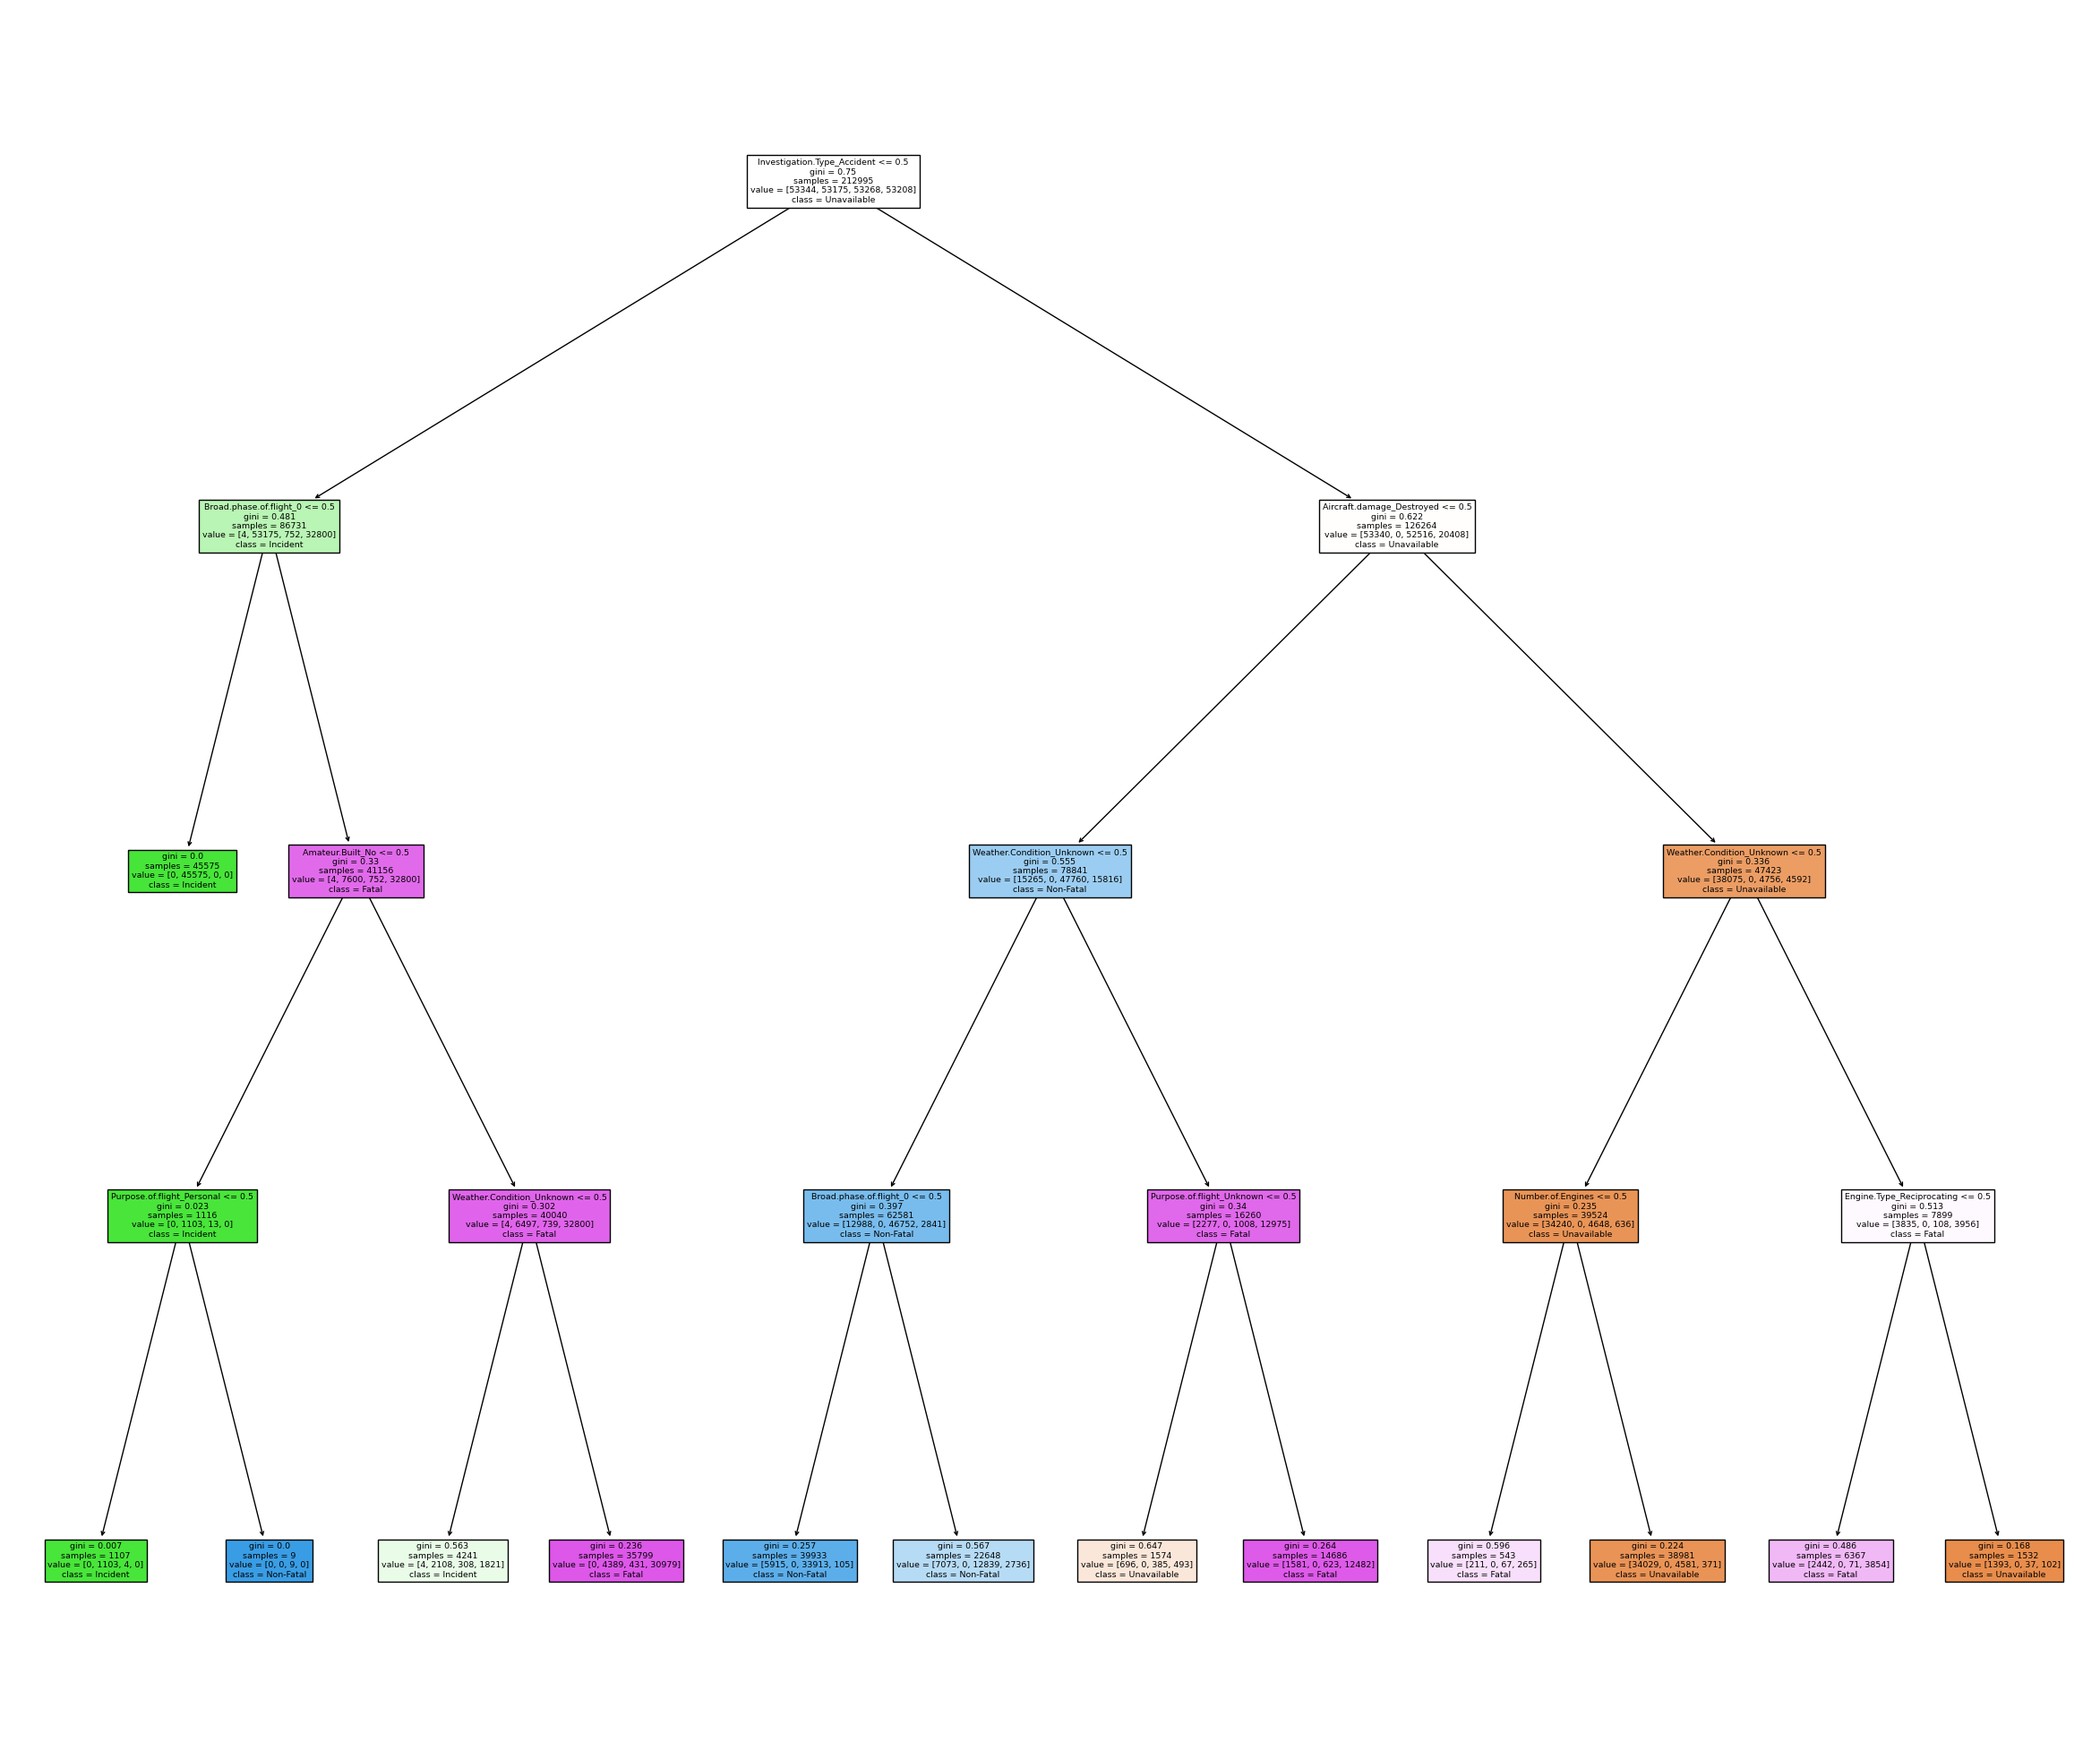

In [21]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(x_train, y_train)

f = plt.figure(figsize = (30,25))
plot_tree(dectree, filled=True, feature_names = x_train.columns, class_names = ["Unavailable","Incident","Non-Fatal","Fatal"])

<AxesSubplot:>

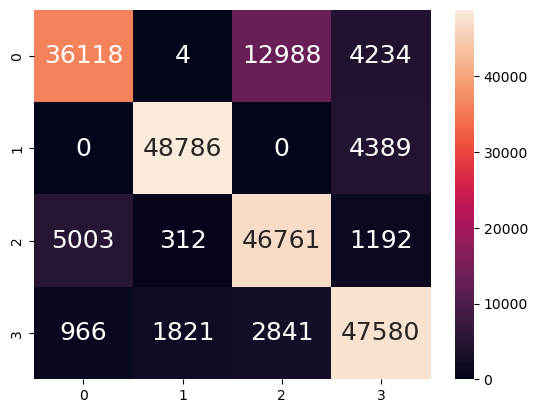

In [22]:
y_train_pred = dectree.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [23]:
print("Train Data")
print("Accuracy:\t", dectree.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.8415455761872345

True positive rate of class 0 train data:	 0.6770770845830834
False negative rate of class 0 train data:	 0.3229229154169166

True positive rate of class 1 train data:	 0.9174612129760226
False negative rate of class 1 train data:	 0.08253878702397743

True positive rate of class 2 train data:	 0.8778441090335661
False negative rate of class 2 train data:	 0.12215589096643388

True positive rate of class 3 train data:	 0.8942264321154714
False negative rate of class 3 train data:	 0.10577356788452864


We will now look at the **Test data**.

<AxesSubplot:>

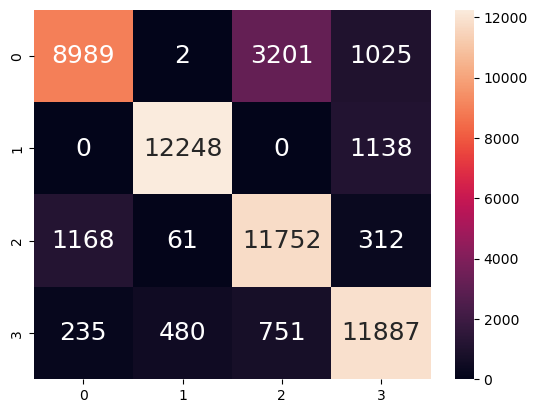

In [24]:
y_test_pred = dectree.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [25]:
print("TestData")
print("Accuracy:\t", dectree.score(x_test, y_test))
print()
cm_test= confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 Testdata:\t", (true0/(true0+false0)))
print("False negative rate of class 0 Testdata:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 Testdata:\t", (true1/(true1+false1)))
print("False negative rate of class 1 Testdata:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 Testdata:\t", (true2/(true2+false2)))
print("False negative rate of class 2 Testdata:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 Testdata:\t", (true3/(true3+false3)))
print("False negative rate of class 3 Testdata:\t",(false3/(true3+false3)))

TestData
Accuracy:	 0.8427576104715582

True positive rate of class 0 Testdata:	 0.6801089505939321
False negative rate of class 0 Testdata:	 0.31989104940606794

True positive rate of class 1 Testdata:	 0.9149858060660392
False negative rate of class 1 Testdata:	 0.08501419393396085

True positive rate of class 2 Testdata:	 0.8840743248326187
False negative rate of class 2 Testdata:	 0.11592567516738132

True positive rate of class 3 Testdata:	 0.8902119373923463
False negative rate of class 3 Testdata:	 0.10978806260765371


Notice that there is a decrease in the overall accuracy in both test data and train data as compared to before upsampling. However, it is good to see that the data is no longer biased to one single class of `Aircraft Damage`. 

We can see that the true postive rate (TPR) in each class are generally improving. Therefore, we will now improve the overall accuracy of the trained model.

### Cross-validation (Grid Search) 

As the depth of the decision tree previously plotted are by random guesses of ours, this might contribute to a reduction of accuracy in our machine learning model. Hence, to improve the accuracy, we will now carry out cross-validation on DecisionTreeClassifier to determine the **optimum depth** of our decision tree. 

In other words, we will now carry out **Cross-validation** for the fine-tuning of the **hyperparameter** of our decision tree.

*A basic intro to cross-validation*

The model performs exhaustive search over specified parameter values for an estimator. Important members are fit, predict.
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

---

What is **cross-validation**?\
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.\
More details at: https://www.mygreatlearning.com/blog/cross-validation/

In [26]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Injury.Severity", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Injury.Severity"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Now, we will build a model of GridSearchCV model, with DecisionTreeClassifier as the base model. We should also include the hyperparameter of our base model, which is `max_depth` (from 2 to 10) for fine-tunning. 

We will be doing a 10-fold cross validation and set **accuracy** as the startegy to evaluate the performance. 

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(2,10)}

svrGrid = GridSearchCV(DecisionTreeClassifier(),
                      param_grid, cv = 10,
                      scoring = 'accuracy')
svrGrid.fit(x_train, y_train["Injury.Severity"].ravel())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

From cross validation, we will now obtain the best choice for the hyperparameter and the score for the best model.

In [28]:
print(svrGrid.best_estimator_)
print(svrGrid.best_score_)

DecisionTreeClassifier(max_depth=9)
0.867250404535292


As we know that if we keep on increasing the depth of the decision tree, there will actually an increase in the accuracy of the base model. However, the processing time of the data should be our concern as well. As the max_depth of the decision tree increases, the time taken for processing may increase as well. Hence, we decided to take the **max_depth = 9**. 

### DecisionTreeClassifier (best model from GridSearchCV)

By refering to the hyperparameter fine-tuninng that has been done above by using **Cross Validation**, we will now set the max_depth of the decision tree to be 9

[Text(0.36446171016483514, 0.95, 'Investigation.Type_Accident <= 0.5\ngini = 0.75\nsamples = 212995\nvalue = [53250, 53165, 53348, 53232]\nclass = Non-Fatal'),
 Text(0.05709134615384615, 0.85, 'Broad.phase.of.flight_0 <= 0.5\ngini = 0.481\nsamples = 86765\nvalue = [6, 53165, 741, 32853]\nclass = Incident'),
 Text(0.05434409340659341, 0.75, 'gini = 0.0\nsamples = 45528\nvalue = [0, 45528, 0, 0]\nclass = Incident'),
 Text(0.059838598901098904, 0.75, 'Amateur.Built_No <= 0.5\ngini = 0.331\nsamples = 41237\nvalue = [6, 7637, 741, 32853]\nclass = Fatal'),
 Text(0.013736263736263736, 0.65, 'Purpose.of.flight_Personal <= 0.5\ngini = 0.021\nsamples = 1122\nvalue = [0, 1110, 12, 0]\nclass = Incident'),
 Text(0.01098901098901099, 0.55, 'Purpose.of.flight_Instructional <= 0.5\ngini = 0.005\nsamples = 1113\nvalue = [0, 1110, 3, 0]\nclass = Incident'),
 Text(0.008241758241758242, 0.45, 'Amateur.Built_Unknown <= 0.5\ngini = 0.004\nsamples = 1112\nvalue = [0, 1110, 2, 0]\nclass = Incident'),
 Text(0.

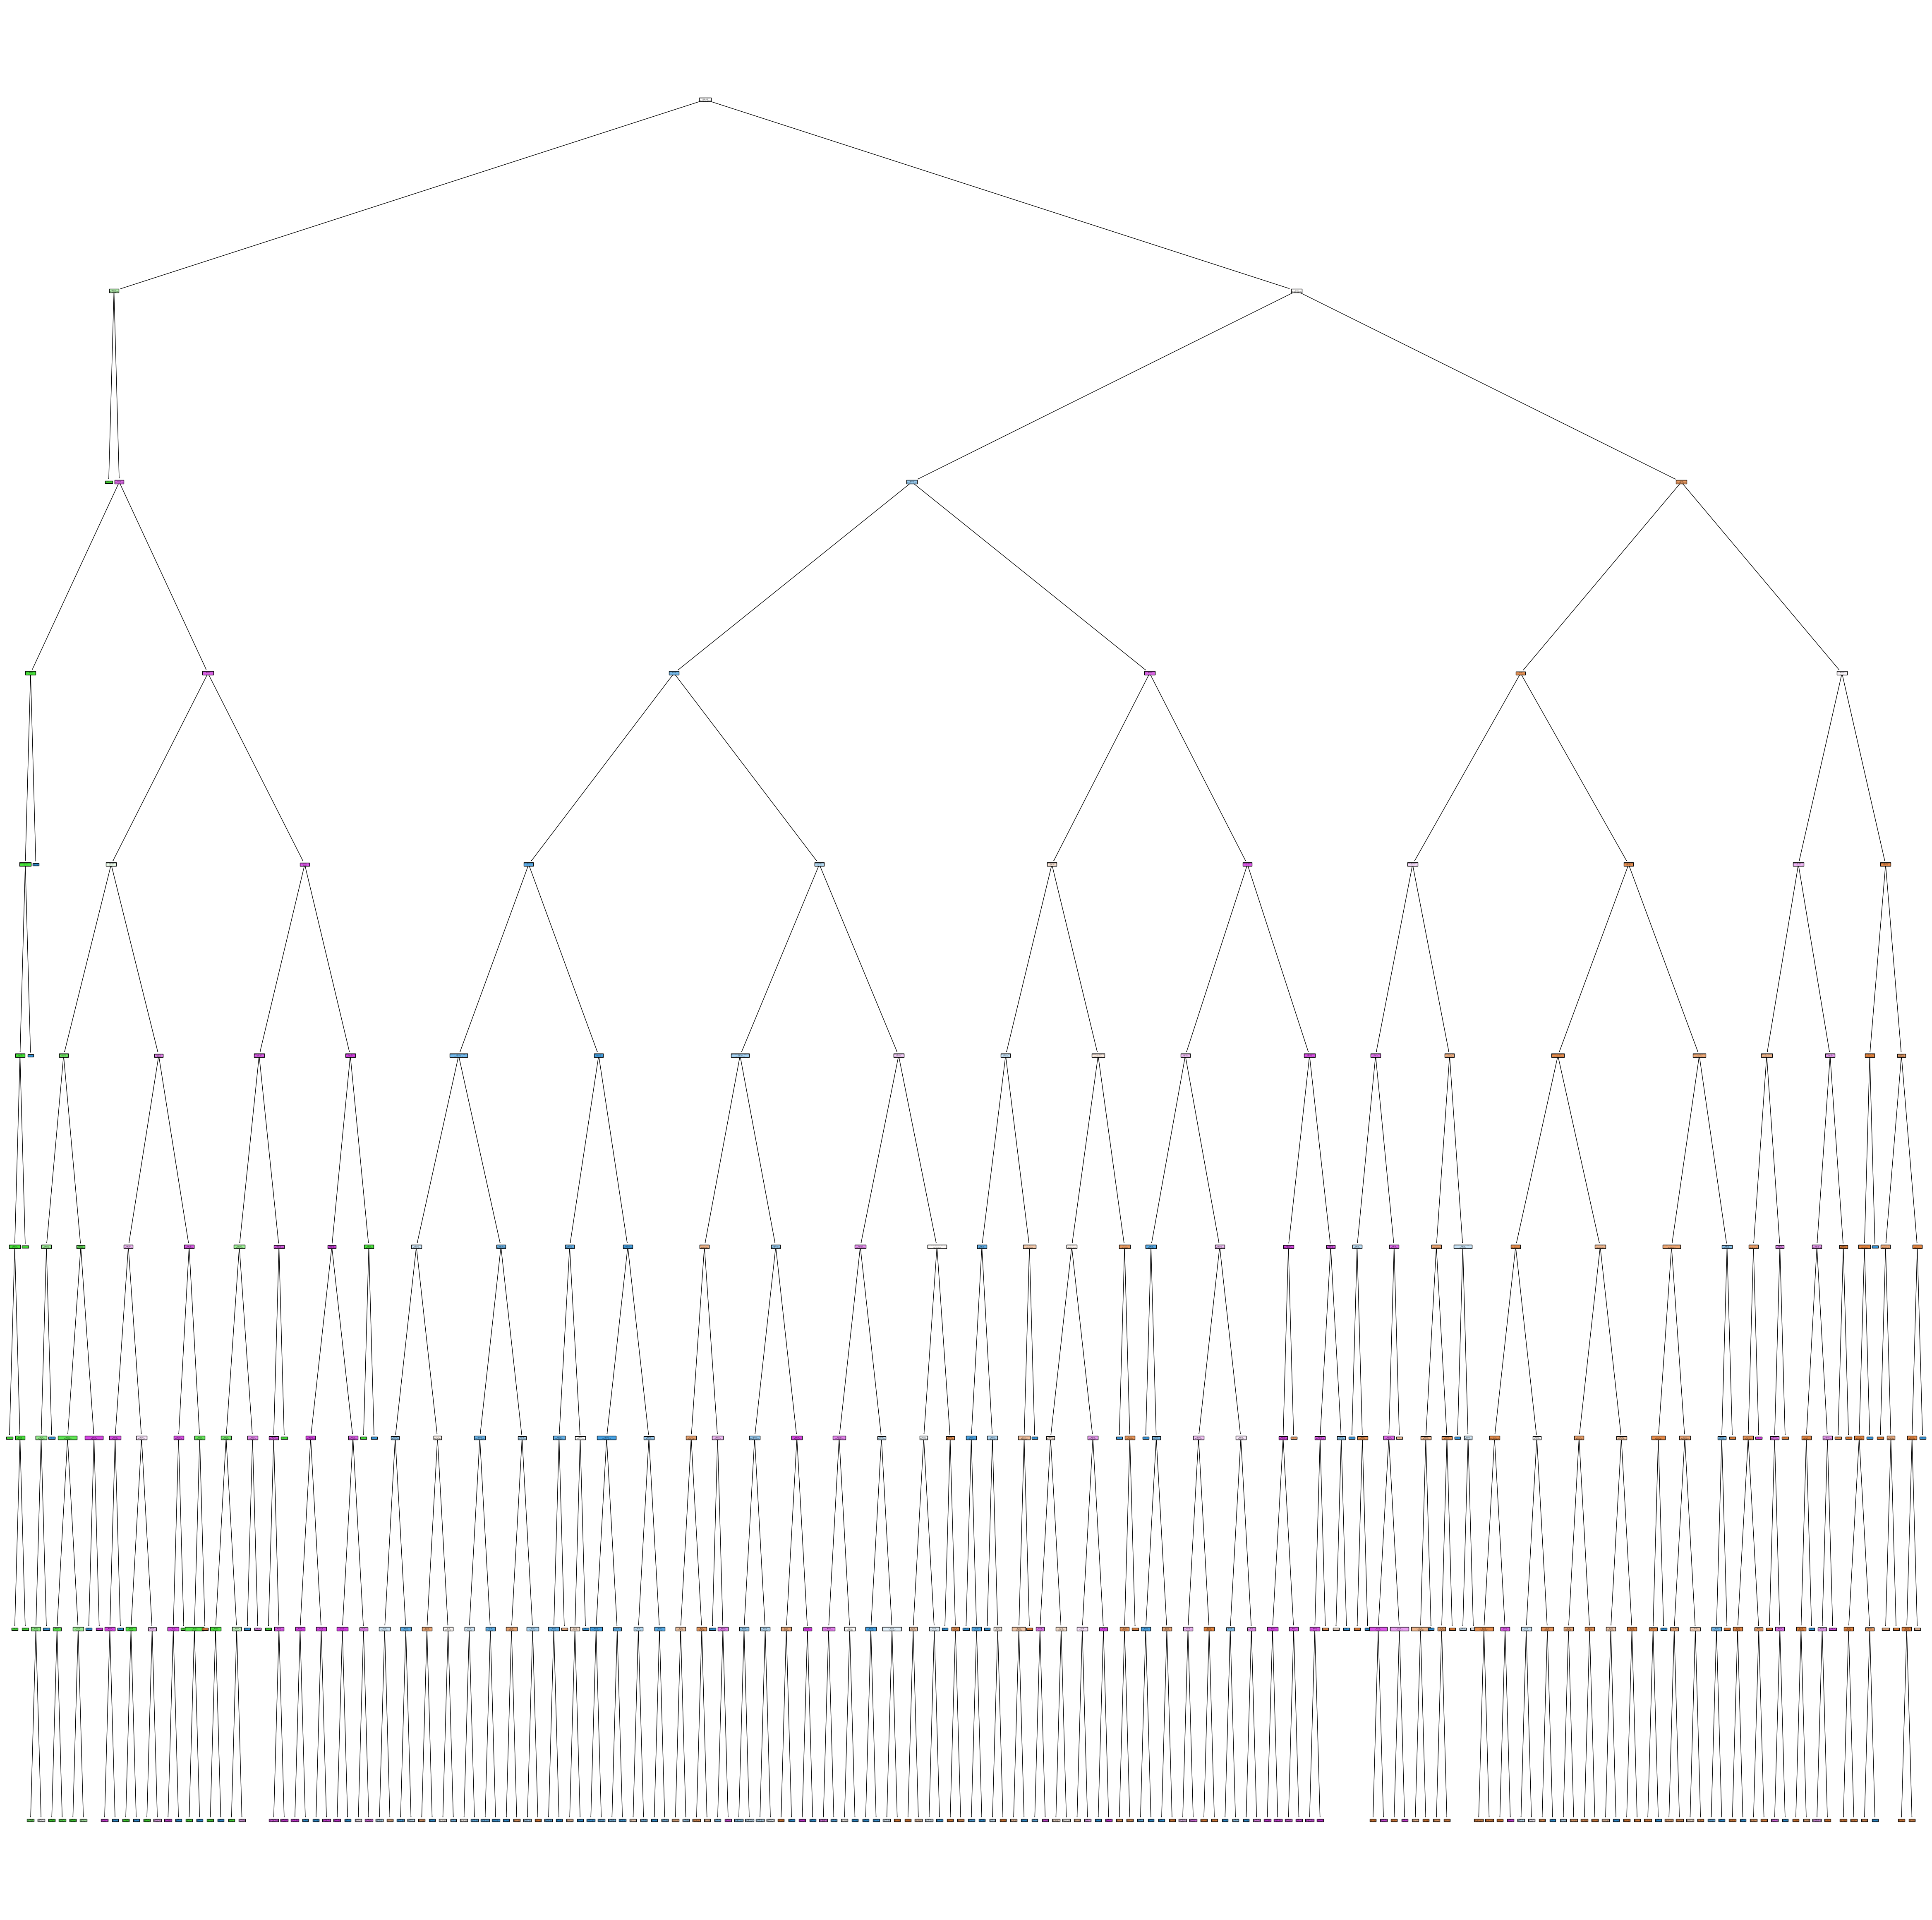

In [29]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Injury.Severity", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Injury.Severity"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 9)
dectree.fit(x_train, y_train)

f = plt.figure(figsize = (60,60))
plot_tree(dectree, filled=True, feature_names = x_train.columns, class_names = ["Unavailable","Incident","Non-Fatal","Fatal"])

<AxesSubplot:>

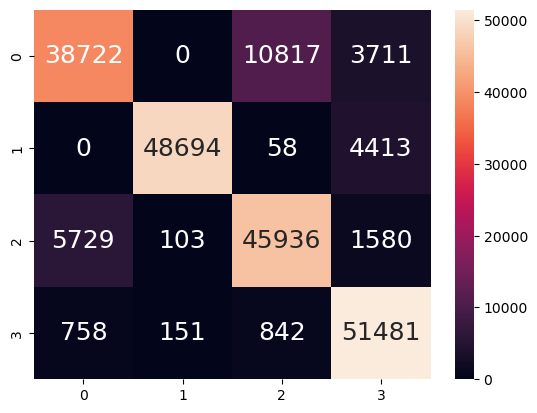

In [30]:
y_train_pred = dectree.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [31]:
print("Train Data")
print("Accuracy:\t", dectree.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.8677809338247376

True positive rate of class 0 train data:	 0.7271737089201878
False negative rate of class 0 train data:	 0.2728262910798122

True positive rate of class 1 train data:	 0.915903319853287
False negative rate of class 1 train data:	 0.08409668014671307

True positive rate of class 2 train data:	 0.8610632076179051
False negative rate of class 2 train data:	 0.13893679238209491

True positive rate of class 3 train data:	 0.9671062518785692
False negative rate of class 3 train data:	 0.03289374812143072


<AxesSubplot:>

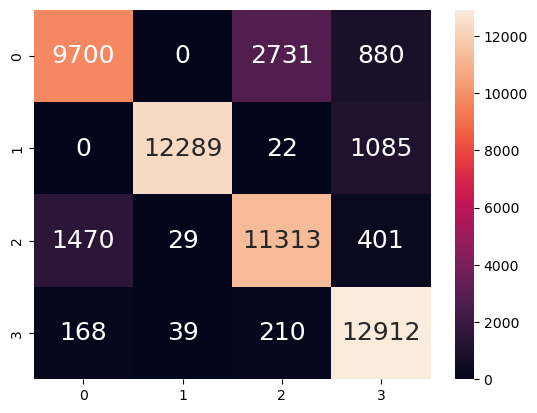

In [32]:
y_test_pred = dectree.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [33]:
print("TestData")
print("Accuracy:\t", dectree.score(x_test, y_test))
print()
cm_test= confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 Testdata:\t", (true0/(true0+false0)))
print("False negative rate of class 0 Testdata:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 Testdata:\t", (true1/(true1+false1)))
print("False negative rate of class 1 Testdata:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 Testdata:\t", (true2/(true2+false2)))
print("False negative rate of class 2 Testdata:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 Testdata:\t", (true3/(true3+false3)))
print("False negative rate of class 3 Testdata:\t",(false3/(true3+false3)))

TestData
Accuracy:	 0.8678848429078481

True positive rate of class 0 Testdata:	 0.728720607016753
False negative rate of class 0 Testdata:	 0.27127939298324694

True positive rate of class 1 Testdata:	 0.9173633920573305
False negative rate of class 1 Testdata:	 0.08263660794266946

True positive rate of class 2 Testdata:	 0.8562022250813592
False negative rate of class 2 Testdata:	 0.14379777491864074

True positive rate of class 3 Testdata:	 0.9687148323205041
False negative rate of class 3 Testdata:	 0.03128516767949584


We can now see that there is an improvement in the overall accuracy in both the test and train data. The model is also not biased to any one of the classes. We could conclude that our machine is well trained now and can predict the responding variable `Injury Severity` well.

### RandomForestClassifier (upsample data)

Time for something which is beyond the syllabus of MA0218. We decided to have a new machine learning predicting our responding variable `Injury Severity` using a new base model named **RandomForestClassifier**. 

*A brief introduction about RandomForestClassifier*

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In previous model, we are only having one decision tree and for now we will be having more decision tree, forming a forest.

More details at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Import the essential library 

In [34]:
from sklearn.ensemble import RandomForestClassifier

y = pd.DataFrame(re_avi_acc2_ohe["Injury.Severity"])
x = pd.DataFrame(re_avi_acc2_ohe.drop("Injury.Severity", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

By random guesses, we will set the base model to be having the following hyperparameter:
- n_estimators: 100 
- max_depth: 4 (being the maximum depth of each of the decision tree)

In [35]:
rfc  = RandomForestClassifier(n_estimators = 100, max_depth = 4)

rfc.fit(x_train, y_train["Injury.Severity"].ravel())

RandomForestClassifier(max_depth=4)

Same as DecisionTreeClassifier, we will now predict the **Train data** using the base model. The heatmap of confusion matrix is plotted following the format below:

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3   |   True 3    |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

Train Data
Accuracy:	 0.8411324209488485

True positive rate of class 0 train data:	 0.6900386303116679
False negative rate of class 0 train data:	 0.30996136968833216

True positive rate of class 1 train data:	 0.8949109845280394
False negative rate of class 1 train data:	 0.10508901547196059

True positive rate of class 2 train data:	 0.8759458495277793
False negative rate of class 2 train data:	 0.12405415047222065

True positive rate of class 3 train data:	 0.9039404701505158
False negative rate of class 3 train data:	 0.09605952984948418


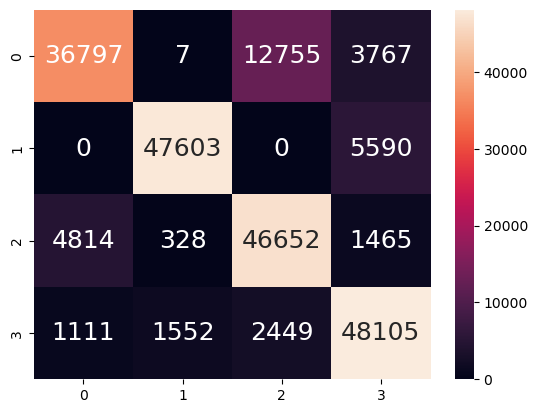

In [36]:
y_train_pred = rfc.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("Train Data")
print("Accuracy:\t", rfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Same as DecisionTreeClassifier, we will now predict the **Test data** using the base model. The heatmap of confusion matrix is plotted following the format below:

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3   |   True 3    |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

test Data
Accuracy:	 0.8400533343349171

True positive rate of class 0 test data:	 0.6840196448809973
False negative rate of class 0 test data:	 0.31598035511900263

True positive rate of class 1 test data:	 0.8965439856373429
False negative rate of class 1 test data:	 0.1034560143626571

True positive rate of class 2 test data:	 0.8757329724853405
False negative rate of class 2 test data:	 0.12426702751465946

True positive rate of class 3 test data:	 0.9026528776978417
False negative rate of class 3 test data:	 0.09734712230215828


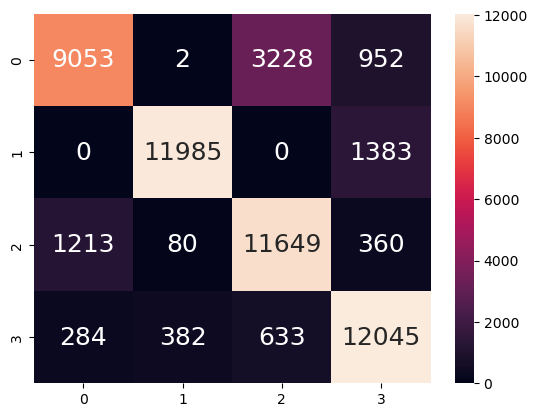

In [37]:
y_test_pred = rfc.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("test Data")
print("Accuracy:\t", rfc.score(x_test, y_test))
print()
cm_test = confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 test data:\t",(false3/(true3+false3)))

The model we built using `RandomForestClassifier` is more accurate as compared to the model we built using `DecisionTreeClassifier` (the one that we have before undergoing cross-validation). 

As compared to the model we built using `DecisionTreeClassifier` (the one we have after undergoing cross-validation), the accuracy found is almost the same. Hence, to further improve accuracy in `RandomForestClassifier`, we will carry out **CrossValidation** to further fine tune our hyperparameter, which are the number of trees in forest and the maximum depth of each decision tree.

### Cross-validation (Grid Search) 

In [38]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Injury.Severity", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Injury.Severity"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Now, we will build a model of GridSearchCV model, with DecisionTreeClassifier as the base model. We should also include the hyperparameter of our base model, which are:
- `n_estimators` : from 100 to 500 with step = 100.
- `max_depth`: from 4 to 10

We will be doing a 5-fold cross validation and set **accuracy** as the startegy to evaluate the performance. 

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.arange(100, 501, 100), 'max_depth': np.arange(4,10)}

svrGrid = GridSearchCV(RandomForestClassifier(),
                      param_grid, cv = 5,
                      scoring = 'accuracy')
svrGrid.fit(x_train, y_train["Injury.Severity"].ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

In [40]:
print(svrGrid.best_estimator_)
print(svrGrid.best_score_)

RandomForestClassifier(max_depth=9, n_estimators=300)
0.864616540294373


### RandomForestClassifier (best model from GridSearchCV)

By refering to the hyperparameter fine-tunninng that has been done above by using **Cross Validation**, we will now set:
- n_estimators: 300
- max_depth: 9

In [65]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Injury.Severity", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Injury.Severity"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rfc  = RandomForestClassifier(n_estimators = 300, max_depth = 9)
rfc.fit(x_train, y_train["Injury.Severity"].ravel())

RandomForestClassifier(max_depth=9, n_estimators=300)

Train Data
Accuracy:	 0.8657104626869175

True positive rate of class 0 train data:	 0.7246404061295478
False negative rate of class 0 train data:	 0.27535959387045217

True positive rate of class 1 train data:	 0.9145398588800481
False negative rate of class 1 train data:	 0.08546014111995195

True positive rate of class 2 train data:	 0.8642835618502336
False negative rate of class 2 train data:	 0.13571643814976647

True positive rate of class 3 train data:	 0.9588589825178752
False negative rate of class 3 train data:	 0.04114101748212481


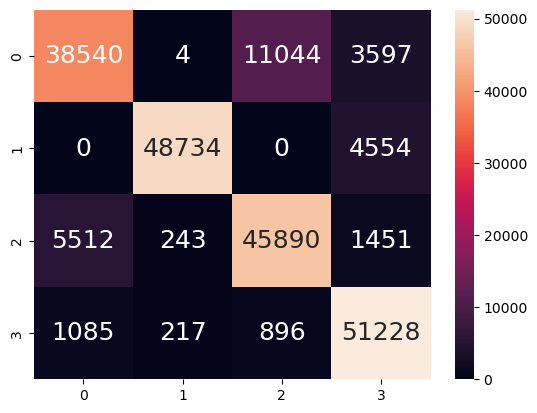

In [66]:
y_train_pred = rfc.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("Train Data")
print("Accuracy:\t", rfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

test Data
Accuracy:	 0.8647861931679468

True positive rate of class 0 test data:	 0.7230113636363636
False negative rate of class 0 test data:	 0.27698863636363635

True positive rate of class 1 test data:	 0.9141866947939425
False negative rate of class 1 test data:	 0.08581330520605741

True positive rate of class 2 test data:	 0.8634236910508727
False negative rate of class 2 test data:	 0.13657630894912737

True positive rate of class 3 test data:	 0.9606395127521888
False negative rate of class 3 test data:	 0.039360487247811195


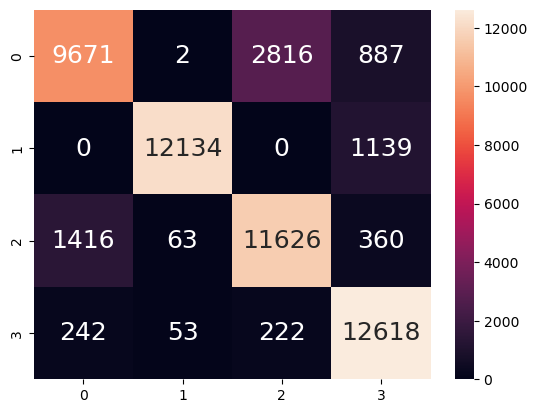

In [67]:
y_test_pred = rfc.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("test Data")
print("Accuracy:\t", rfc.score(x_test, y_test))
print()
cm_test = confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 test data:\t",(false3/(true3+false3)))

As we can see even after carrying out fine-tunning on the hyper parameter of `RandomForestClassifier` by using **cross validation**, the accuracy does not improve significantly. Hence, we suspect that the Random Forest Classifier may be overfitted using too much predictors. \
Hence, we decided to choose only **three predictors** by looking at the `Feature Importance` of each predictors. 

### RandomForestClassifier (using Feature Importance)

Note that we are evaluating the Feature Importance by using `Feature Permutation`.

More on **Feature Permutation**: \
First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. \ 
Next, a feature column from the validation set is permuted and the metric is evaluated again. The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance

In [44]:
# Changing all the categorical data into 'numerical' data

Investigation = pd.factorize(avi_clean['Investigation.Type'])
fatality = pd.factorize(avi_clean["Injury.Severity"])
Aircraft = pd.factorize(avi_clean['Aircraft.damage'])
Amateur = pd.factorize(avi_clean['Amateur.Built'])
Number = pd.factorize(avi_clean['Number.of.Engines'])
Engine = pd.factorize(avi_clean['Engine.Type'])
Purpose = pd.factorize(avi_clean['Purpose.of.flight'])
Weather = pd.factorize(avi_clean['Weather.Condition'])
phase = pd.factorize(avi_clean['Broad.phase.of.flight'])


InvestList = []
for i in Investigation[0]:
    InvestList.append(i)
craftList = []
for i in Aircraft[0]:
    craftList.append(i) 
AmateurList = []
for i in Amateur[0]:
    AmateurList.append(i)
NumberList = []
for i in Number[0]:
    NumberList.append(i)
EngineList = []
for i in Engine[0]:
    EngineList.append(i)
PurposeList = []
for i in Purpose[0]:
    PurposeList.append(i)
WeatherList = []
for i in Weather[0]:
    WeatherList.append(i)
phaseList = []
for i in phase[0]:
    phaseList.append(i)
fatalityList = []
for i in fatality[0]:
    fatalityList.append(i)
    
PredList = pd.DataFrame()
PredList["Number.of.Engines"] = avi_clean["Number.of.Engines"] 
PredList["Number of plane involved"] = avi_clean["Number of plane involved"]
PredList["Investigation.Type"] = InvestList
PredList["Aircraft.damage"] = craftList
PredList["Amateur.Built"] = AmateurList
PredList["Number.of.Engines"] = NumberList
PredList["Engine.Type"] = EngineList
PredList["Purpose.of.flight"] = PurposeList
PredList["Weather.Condition"] = WeatherList
PredList["Broad.phase.of.flight"] = phaseList

PredList["Injury.Severity"] = fatalityList


avi_acc_fac = PredList
avi_acc_fac

,Number.of.Engines,Number of plane involved,Investigation.Type,Aircraft.damage,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Injury.Severity
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...
87277,0,1,0,0,0,1,1,0,1,0
87278,0,1,0,3,0,1,11,0,1,1
87279,0,1,0,3,0,1,0,0,1,0
87280,0,1,0,3,0,1,1,0,1,1


In [45]:
y = pd.DataFrame(avi_acc_fac["Injury.Severity"])
x = pd.DataFrame(avi_acc_fac.drop("Injury.Severity", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [46]:
rfc  = RandomForestClassifier(n_estimators = 100, max_depth = 4)
rfc.fit(x_train, y_train["Injury.Severity"].ravel())

RandomForestClassifier(max_depth=4)

From the `permutation_importance` **bar chart** below below, we can tell that the most significant predictors are `Aircraft Damage`, `Investigation.Type` and `Broad.phase.of.flight`. 

In [47]:
from sklearn.inspection import permutation_importance
import time
feature_names = [f"feature {i}" for i in x]
start_time = time.time()
result = permutation_importance(rfc, x_test, y_test)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.DataFrame(abs(result.importances_mean), index=feature_names, columns = ["Mean Accuracy Decrease"])
forest_importances

Elapsed time to compute the importances: 3.475 seconds


,Mean Accuracy Decrease
feature Number.of.Engines,0.000676
feature Number of plane involved,0.000011
feature Investigation.Type,0.034405
feature Aircraft.damage,0.145592
feature Amateur.Built,0.000172
feature Engine.Type,0.000527
feature Purpose.of.flight,0.000183
feature Weather.Condition,0.005683
feature Broad.phase.of.flight,0.021756


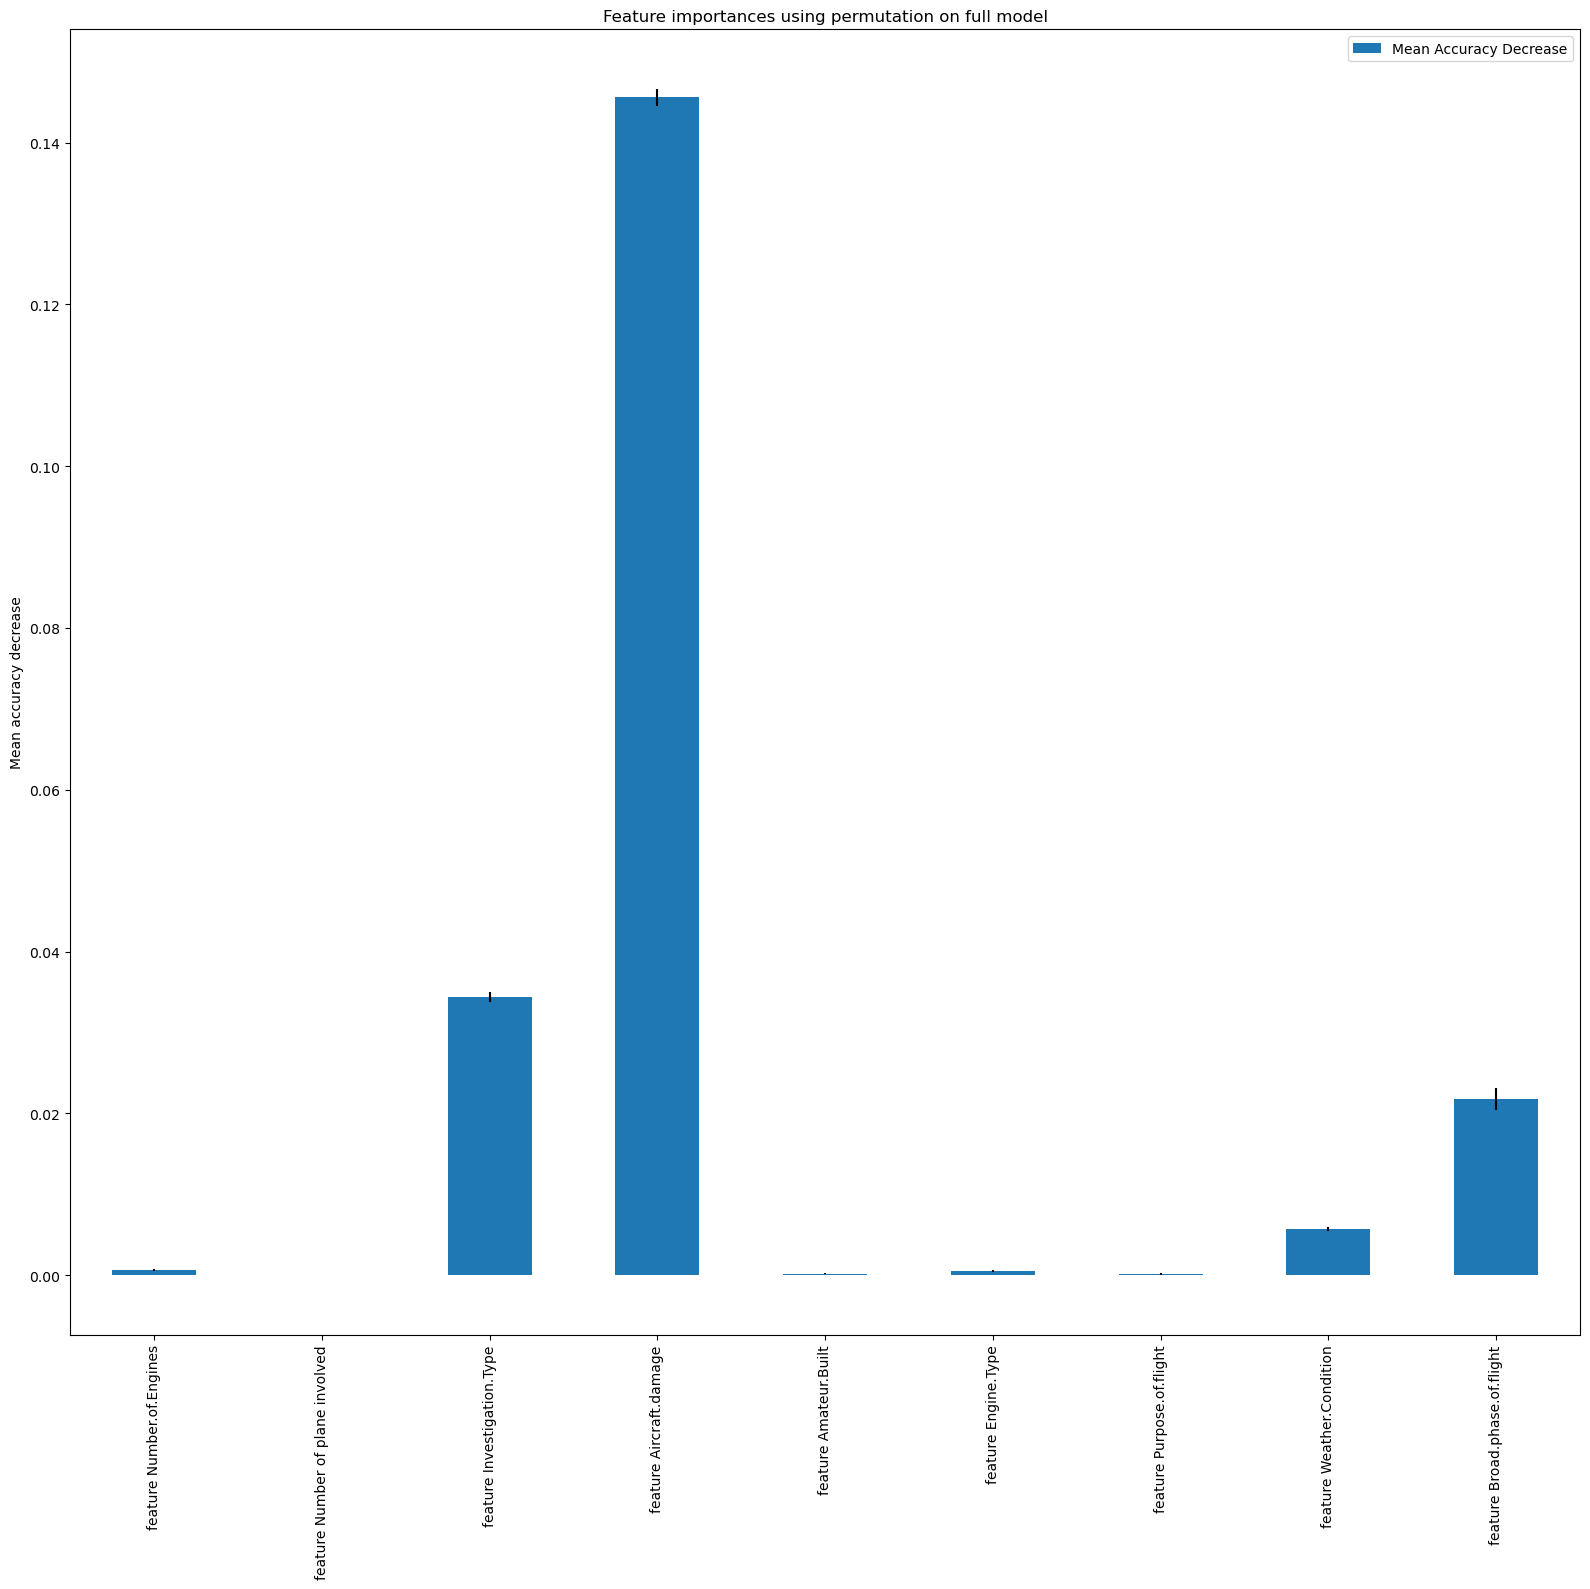

In [48]:
fig, ax = plt.subplots(figsize = (16,16))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [49]:
re_avi_acc2_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266244 entries, 5 to 17405
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Number.of.Engines                                      266244 non-null  int64  
 1   Number of plane involved                               266244 non-null  int64  
 2   Investigation.Type_Accident                            266244 non-null  float64
 3   Investigation.Type_Incident                            266244 non-null  float64
 4   Aircraft.damage_Destroyed                              266244 non-null  float64
 5   Aircraft.damage_Minor                                  266244 non-null  float64
 6   Aircraft.damage_Substantial                            266244 non-null  float64
 7   Aircraft.damage_Unknown                                266244 non-null  float64
 8   Amateur.Built_No                   

We will now carry out **Random Forest Classifier** based on the three predictors that has the highest `Feature Importance`. \
The hyperparameter used for Random Forest Classifier is based on the result of **CV Grid Search**, ie:
- n_estimators = 300
- max_depth = 9

In [50]:
impt_avi_acc2 = re_avi_acc2_ohe[["Investigation.Type_Accident", "Investigation.Type_Incident", 
                                                "Aircraft.damage_Destroyed", "Aircraft.damage_Minor","Aircraft.damage_Substantial", 
                                               "Aircraft.damage_Unknown", "Broad.phase.of.flight_0", "Broad.phase.of.flight_1", 
                                                "Broad.phase.of.flight_2", "Broad.phase.of.flight_3", "Broad.phase.of.flight_4",
                                                "Injury.Severity"]]
impt_avi_acc2

,Investigation.Type_Accident,Investigation.Type_Incident,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,Aircraft.damage_Unknown,Broad.phase.of.flight_0,Broad.phase.of.flight_1,Broad.phase.of.flight_2,Broad.phase.of.flight_3,Broad.phase.of.flight_4,Injury.Severity
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Non-Fatal
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Non-Fatal
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Non-Fatal
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Non-Fatal
10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Non-Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...
54332,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Fatal
69234,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Fatal
54304,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Fatal
67839,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Fatal


In [68]:
y = pd.DataFrame(impt_avi_acc2["Injury.Severity"])
x = pd.DataFrame(impt_avi_acc2.drop("Injury.Severity", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rfc  = RandomForestClassifier(n_estimators = 300, max_depth = 9)
rfc.fit(x_train, y_train["Injury.Severity"].ravel())

RandomForestClassifier(max_depth=9, n_estimators=300)

Train Data
Accuracy:	 0.7892063193971689

True positive rate of class 0 train data:	 0.7160922995978805
False negative rate of class 0 train data:	 0.2839077004021196

True positive rate of class 1 train data:	 0.8638111134032219
False negative rate of class 1 train data:	 0.13618888659677814

True positive rate of class 2 train data:	 0.8885796490964138
False negative rate of class 2 train data:	 0.11142035090358614

True positive rate of class 3 train data:	 0.6883833549186328
False negative rate of class 3 train data:	 0.3116166450813672


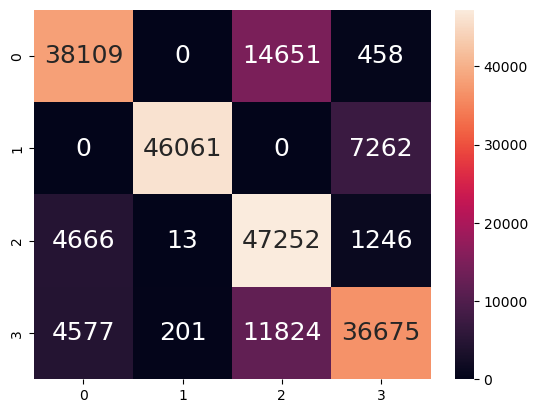

In [69]:
y_train_pred = rfc.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("Train Data")
print("Accuracy:\t", rfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

test Data
Accuracy:	 0.789667411594584

True positive rate of class 0 test data:	 0.7130330510379974
False negative rate of class 0 test data:	 0.28696694896200253

True positive rate of class 1 test data:	 0.8639522586493428
False negative rate of class 1 test data:	 0.1360477413506572

True positive rate of class 2 test data:	 0.8829946204423191
False negative rate of class 2 test data:	 0.11700537955768081

True positive rate of class 3 test data:	 0.698584763625414
False negative rate of class 3 test data:	 0.30141523637458595


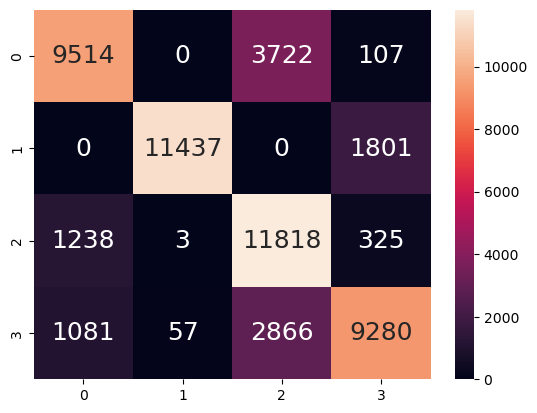

In [70]:
y_test_pred = rfc.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("test Data")
print("Accuracy:\t", rfc.score(x_test, y_test))
print()
cm_test = confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 test data:\t",(false3/(true3+false3)))

From the result above, we find out that the accuracy does not improve, instead it decreases. Hence, we shall use another model named `BalancedRandomForestClassifier`. 

### BalancedRandomForestClassifier

In this machine learning model, we will not use the oversampled data. Instead, we will be using the model `BalancedRandomForestClassifier` from *imblearn* library. 

More details about *imblearn lirbrary*:
https://imbalanced-learn.org/stable/

**Concept of ensemble**

```Ensemble``` learning gives credence to the idea of the **“wisdom of crowds”**, which suggests that the decision-making of a larger group of people is typically better than that of an individual expert. Similarly, ```ensemble``` learning refers to a group (or ```ensemble```) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a *base or weak learner*, may not perform well individually due to *high variance or high bias*. However, when weak learners are aggregated, they can form a strong learner, as their combination *reduces bias or variance, yielding better model performance*.

More about ensemble learning: 

https://bdtechtalks.com/2020/11/12/what-is-ensemble-learning/

We will start off by using the dataset that the categorical variables that are encoded. 

In [54]:
avi_acc2_ohe.head()

,Number.of.Engines,Number of plane involved,Investigation.Type_Accident,Investigation.Type_Incident,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,Aircraft.damage_Unknown,Amateur.Built_No,Amateur.Built_Unknown,...,Purpose.of.flight_Unknown,Weather.Condition_Instrument Meterological Conditions,Weather.Condition_Unknown,Weather.Condition_Visual Meteorological Conditions,Broad.phase.of.flight_0,Broad.phase.of.flight_1,Broad.phase.of.flight_2,Broad.phase.of.flight_3,Broad.phase.of.flight_4,Injury.Severity
0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Fatal
1,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Fatal
2,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Fatal
3,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Fatal
4,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Fatal


In [55]:
avi_acc2_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Number.of.Engines                                      87282 non-null  int64  
 1   Number of plane involved                               87282 non-null  int64  
 2   Investigation.Type_Accident                            87282 non-null  float64
 3   Investigation.Type_Incident                            87282 non-null  float64
 4   Aircraft.damage_Destroyed                              87282 non-null  float64
 5   Aircraft.damage_Minor                                  87282 non-null  float64
 6   Aircraft.damage_Substantial                            87282 non-null  float64
 7   Aircraft.damage_Unknown                                87282 non-null  float64
 8   Amateur.Built_No                              

We will now start with the machine learning model `BalancedRandomForestClassifier`. A **BalanceRandomForestClassifier** will under-sample each bootstrap sample to balance it. 
More info about `BalancedRandomForestClassifier`: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

Import the essential library. 

In [56]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [58]:
y = pd.DataFrame(avi_acc2_ohe["Injury.Severity"])
x = pd.DataFrame(avi_acc2_ohe.drop("Injury.Severity", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

We will now build a BalacedRandomForestClassifier by using the parameters stated below: 
- n_estimators: 100
- criterion: gini (as our concern is to build a machine learning for classification)
- max_depth: None (Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
- sampling_strategy: auto
- random_state: None (the random number generator is the RandomState instance used by np.random.)

In [59]:
brfc = BalancedRandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth = None, 
                                     sampling_strategy = "auto", random_state = None)
brfc.fit(x_train, y_train["Injury.Severity"].ravel())

BalancedRandomForestClassifier()

We will now predict the **train data** using `BalancedRandomForestClassifier`. The heatmap will be plotted using the format below. 

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3   |   True 3    |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

<AxesSubplot:>

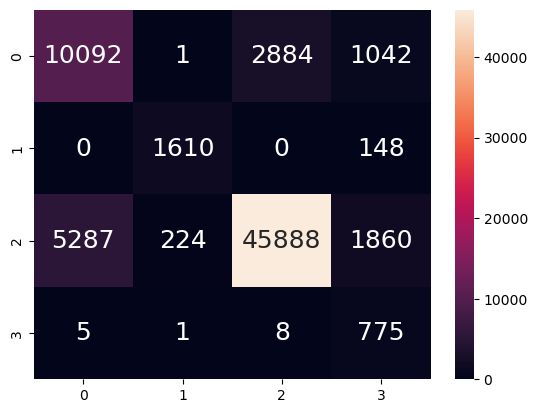

In [60]:
y_train_pred = brfc.predict(x_train)
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [61]:
print("Train Data")
print("Accuracy:\t", brfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.835875402792696

True positive rate of class 0 train data:	 0.719880162636422
False negative rate of class 0 train data:	 0.280119837363578

True positive rate of class 1 train data:	 0.9158134243458476
False negative rate of class 1 train data:	 0.08418657565415244

True positive rate of class 2 train data:	 0.8616008561933194
False negative rate of class 2 train data:	 0.13839914380668056

True positive rate of class 3 train data:	 0.982256020278834
False negative rate of class 3 train data:	 0.017743979721166033


We will now predict the **test data** using `BalancedRandomForestClassifier`. The heatmap will be plotted using the format below. 

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   True 3    |   False 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 | 

<AxesSubplot:>

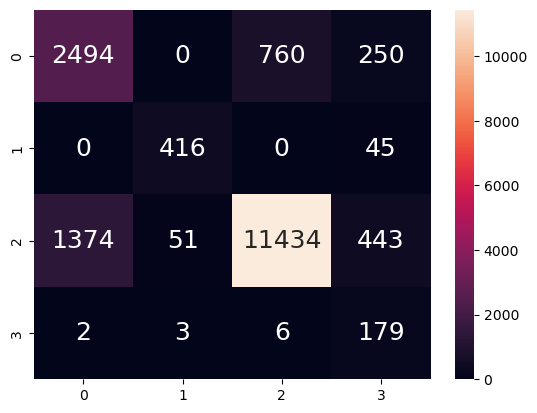

In [62]:
y_test_pred = brfc.predict(x_test)
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [64]:
print("Test Data")
print("Accuracy:\t", brfc.score(x_test, y_test))
print()
cm_Test = confusion_matrix(y_test, y_test_pred)
true0 = cm_Test[0][0]
true1 = cm_Test[1][1]
true2 = cm_Test[2][2]
true3 = cm_Test[3][3]
false0 = cm_Test[0][1] + cm_Test[0][2] + cm_Test[0][3]
false1 = cm_Test[1][0] + cm_Test[1][2] + cm_Test[1][3]
false2 = cm_Test[2][0] + cm_Test[2][1] + cm_Test[2][3]
false3 = cm_Test[3][0] + cm_Test[3][1] + cm_Test[3][2]

print("True positive rate of class 0 test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 test data:\t",(false3/(true3+false3)))

Test Data
Accuracy:	 0.8319298848599416

True positive rate of class 0 test data:	 0.71175799086758
False negative rate of class 0 test data:	 0.2882420091324201

True positive rate of class 1 test data:	 0.9023861171366594
False negative rate of class 1 test data:	 0.09761388286334056

True positive rate of class 2 test data:	 0.8595699894752669
False negative rate of class 2 test data:	 0.1404300105247331

True positive rate of class 3 test data:	 0.9421052631578948
False negative rate of class 3 test data:	 0.05789473684210526


We can see that the overall accuracy of the `BalancedRandomForestClassifier` is slightly lower than the upsample `RandomForestClassifier` with cross validation to fine tune the hyperparamter of the model. 

However, `BalancedRandomForestClassifier` has a much lesser runtime as compared to `RandomForestClassifier` as cross validation process has taken up lots of time. 